<font size=4.5>https://blog.csdn.net/thy0000/article/details/122783136
    tensorflow安装步骤（CPU版本，Anaconda环境下，Windows10）

**<font size=5>使用tesorflow实现手写数字识别</font>**
# tensorflow简介
<font size=4.5>TensorFlow是谷歌开源的一款深度学习框架，首次发布于2015年，TensorFlow2发布于2019年，TensorFlow2.0.0正式稳定版发布于2019年10月1日。目前最新版本为：TensorFlow 2.12.0<p>TensorFlow使用数据流模型（即计算图）来描述计算过程.<p>程序 = 数据结构 + 算法。<p>
TensorFlow程序 = 张量数据结构 + 计算图算法语言。
    
   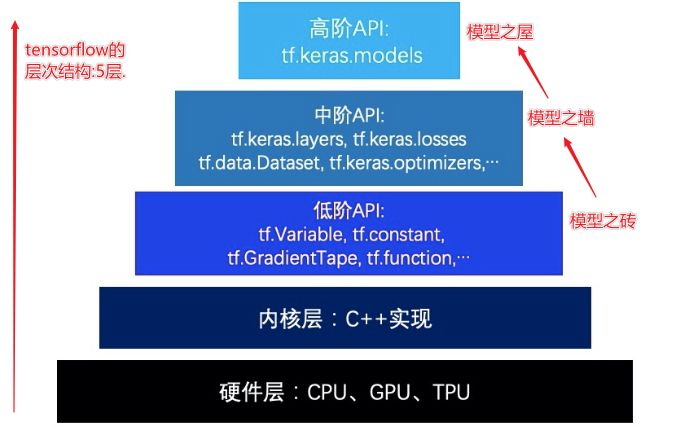

<font size=4.5>**CPU（Central Processing Unit，中央处理器）**擅长调动、管理、协调能力。CPU相当于公司的CEO负责管理和协调。<p>
    **GPU**随着生产中对图片处理的需求越来越大，从2D到3D图片处理，对于图片相关工作，还是需要专门的工种比如UI，这时候诞生了GPU--它就像是处理图片的加速器。<p>
**TPU**同样也是一个加速器，TPU的全称是Tensor Processing Unit，即张量处理器。随着AI智能产业的发展，这时候谷歌就在想，是否能够做一个芯片专门用于机器学习算法的芯片呢？这这样TPU诞生了。

In [2]:
import tensorflow as tf
print(tf.__version__)

AttributeError: module 'tensorflow' has no attribute '__version__'

: 

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders()

AttributeError: module 'tensorflow_datasets' has no attribute 'list_builders'

# tensorflow基础
## Tensor
<font size=4.5> **Tensor （张量）:** TensorFlow 的张量在概念上等同于多维数组，我们可以使用它来描述数学中的标量（0 维数组）、向量（1 维数组）、矩阵（2 维数组）等各种量

In [ ]:
random_float = tf.random.uniform(shape=())
# 定义一个有2个元素的零向量
zero_vector = tf.zeros(shape=(2))
# 定义两个2×2的常量矩阵
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])
print(random_float)
print(zero_vector)
print(A,B)

tf.Tensor(0.74971247, shape=(), dtype=float32)
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


<font size=4.5>张量的**重要属性**是其形状、类型和值。可以通过张量的 shape 、 dtype 属性和 numpy() 方法获得。例如：

In [ ]:
print(A.shape)
print(A.dtype)
print(A.numpy())

(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


## 自动求导机制
<font size=4.5>**<font color='red'>自动求导机制 </font>**<p>
在机器学习中，我们经常需要计算函数的导数。TensorFlow 提供了强大的自动求导机制来计算导数。在即时执行模式下，TensorFlow 引入了 tf.GradientTape() 这个 “求导记录器” 来实现自动求导。以下代码展示了如何使用 tf.GradientTape() 计算函数 y(x) = x^2 在 x = 3 时的导数：

In [ ]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    y = tf.square(x)
y_grad = tape.gradient(y, x)        # 计算y关于x的导数
print(y,'\n',y_grad)

tf.Tensor(9.0, shape=(), dtype=float32) 
 tf.Tensor(6.0, shape=(), dtype=float32)


# TensorFlow 模型建立与训练 
<font size=4.5>在 TensorFlow 中，推荐使用 **tf.keras**（ Keras ）构建模型。Keras 是一个广为流行的高级神经网络 API，简单、快速而不失灵活性，现已得到 TensorFlow 的官方内置和全面支持。<p>
Keras 有两个重要的概念： **模型（Model） 和 层（Layer）** 。<p>层将各种计算流程和变量进行了封装（例如基本的全连接层，CNN 的卷积层、池化层等）<p>模型则将各种层进行组织和连接，并封装成一个整体，描述了如何将输入数据通过各种层以及运算而得到输出。<p>Keras 在 tf.keras.layers 下内置了深度学习中大量常用的的预定义层，同时也允许我们自定义层。


## 导入模块

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
#用于配置matplotlib以在notebook中内联显示图形。这意味着生成的图形将直接显示在代码单元格下面，而不是在新窗口中。
import numpy as np
import os     
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
#修改系统的环境变量PATH，通过添加Graphviz的bin目录的路径。
from tensorflow.python.keras.utils.vis_utils import plot_model
#plot_model函数用于可视化神经网络模型的结构。

## 搭建网络
<font size=4.5>使用model=tf.keras.models.Sequential()<p>
    Sequential()方法是一个容器，描述了神经网络的网络结构，在Sequential()的输入参数中描述从输入层到输出层的网络结构<p>
    拉直层：tf.keras.layers.Flatten() 不含计算，把输入特征拉直成一维数组<p>
全连接层：tf.keras.layers.Dense(神经元个数，activation=“激活函数”，kernel_regularizer=哪种正则化)<p>
activation（字符串给出）可选：relu，softmax，sigmoid，tanh<p>
kernel_regularizer可选：tf.keras.regularizer.l1()、tf.keras.regularizer.l2()<p>
卷积层：tf.keras.layers.Conv2D(…)<p>
lstm层：tf.keras.layers.LSTM()<p>


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    #Flatten层将输入展平，即它将多维输入转换为一维输入。
    # input_shape=(784,)参数指定输入的形状为784维，
    # 这通常用于处理28x28像素的图像，因为28*28=784。
    tf.keras.layers.Dense(256,activation=tf.nn.relu),#全连接层（784，256）
    tf.keras.layers.Dense(128,activation=tf.nn.relu),#激活函数relu
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) 
    
])

In [ ]:
model.summary()
'''模型中每一层的名称。
每一层的输出形状。
每一层的参数数量。
总参数数量，以及可训练和不可训练的参数数量。'''

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


'模型中每一层的名称。\n每一层的输出形状。\n每一层的参数数量。\n总参数数量，以及可训练和不可训练的参数数量。'

In [ ]:
plot_model(model, show_shapes=True)

ImportError: cannot import name 'wrappers' from 'tensorflow.python.keras.layers' (c:\Users\cheny\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\layers\__init__.py)

## 配置训练方法
<font size=4.5>model.compile：在compile()中配置训练方法:选择优化器、损失函数、评测指标<p>
    **<font color='red'> optimizer可选：</font>**<p>
'sgd’或tf.kears.optimizer.SGD(lr=学习率，momentum=动量参数)<p>
'adagrad’或tf.kears.optimizer.Adagrad(lr=学习率)<p>
'adadelta’或tf.kears.optimizer.Adadelta(lr=学习率)<p>
'adam’或tf.kears.optimizer.Adam(lr=学习率，beta_1=0.9，beta_2=0.999)<p>
**<font color='red'>loss可选：</font>**<p>
'mse’或tf.kears.loss.MeanSquaredError()<p>
'sparse_categorical_crossentropy’或tf.kears.loss.SparseCategoricalCrossentropy(from_logits=False)<p>
**<font color='red'>Metrics可选：</font>**<p>
‘accuracy’，‘categorical_accuracy’(y和y_是独热编码)，‘sparse_categorical_accuracy’(y_是数值，y是独热编码)

    
logits表示网络的直接输出 ,没经过sigmoid或者softmax的概率化。from_logits=False就表示把已经概率化了的输出,label需要用one-hot格式；from_logits=True，则直接使用标签格式。

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy'])

## 告知训练集和测试集

In [ ]:
(d_train,l_train),(d_test,l_test)=tf.keras.datasets.mnist.load_data()
print(d_train.shape,l_train.shape)

(60000, 28, 28) (60000,)


## 训练网络
<font size=4.5>model.fit：在fit()中训练，训练集和测试集喂入网络，告知每个batch是多少，要迭代多少epochs<p>
    model.fit(训练集数据，训练集的标签，batch_size= ，epochs= ，validation_data=(测试集的输入特征，测试集的标签)


In [ ]:
nd_train=d_train.reshape([-1,784])
nl_train=tf.one_hot(l_train,10)
nd_test=d_test.reshape([-1,784])
nl_test=tf.one_hot(l_test,10)

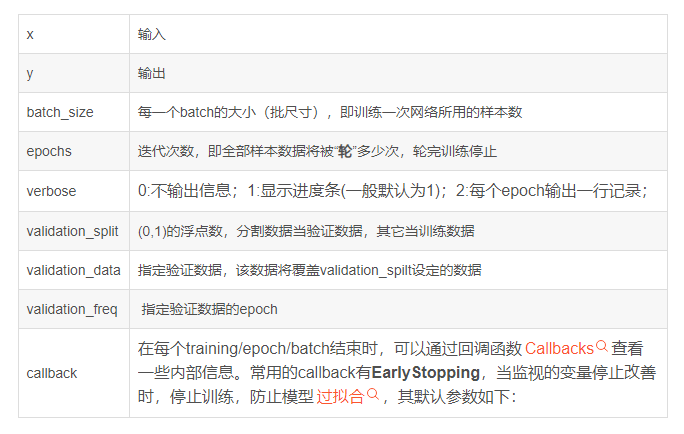

In [ ]:
model.fit(nd_train,nl_train,
             batch_size=128,
             epochs=10,
            validation_data=(nd_test,nl_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
467/469 [============================>.] - ETA: 0s - loss: 2.4117 - accuracy: 0.8930WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023D3AD203A0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 5s 7ms/step - loss: 2.4065 - accuracy: 0.8930 - val_loss: 0.7640 - val_accuracy: 0.9176
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4223 - accuracy: 0.9427 - val_loss: 0.5082 - val_accuracy: 0.9331
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2352 - accuracy: 0.9571 - val_loss: 0.3346 - val_accuracy: 0.9469
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1530 - accuracy: 0.9680 - val_loss: 0.3287 - val_accuracy: 0.9500
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1247 - accuracy: 0.9725 

## 网络测评model.evaluate()



In [ ]:
scores = model.evaluate(nd_train, nl_train, verbose=0)
print("测试数据集正确率为:" ,'%.2f' %(scores[1]*100) , "%")

测试数据集正确率为: 97.81 %


## 网络应用

In [ ]:
%%time
y=model(nd_test)

CPU times: total: 15.6 ms
Wall time: 40.9 ms


In [ ]:
%%time
y1=model.predict(nd_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step
CPU times: total: 6.19 s
Wall time: 1.11 s


<font size=4.5 color='red'>使用predict进行预测时，如果只对一张图片预测，也需要用切片的方式输入被预测的数据,如只预测第5张图片，则d_test[4:5,:]否则会报错</font>

In [ ]:

result=model.predict(nd_test[0:1])
# result=model.predict(nd_test[0:1,:])
print(type(result))
print(result.shape)
print(np.argmax(result[0]))
print(np.argmax(nl_test[0:1]))
# print(d_train[2].shape)

1/1 [==============================] - 0s 17ms/step
<class 'numpy.ndarray'>
(1, 10)
7
7


In [ ]:
res1=model(nd_test[0:10,:])
res1=np.argmax(res1,axis=1)
print(res1)
plt.figure(dpi=100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(d_test[i,:],cmap=plt.cm.gray)
    plt.title(res1[i])
    plt.xticks([])
    plt.yticks([])

NameError: name 'model' is not defined

## 测试其他数据集
<font size=4.5>使用训练好的网络预测一下fasion_minist数据集，因为fasion_minist和minist的数据格式完全一样，所以可以直接应用</font>

In [ ]:
(fd_train,fl_train),(fd_test,fl_test)=tf.keras.datasets.fashion_mnist.load_data()
print(fd_train.shape,fl_train.shape,fd_test.shape,fl_test.shape)


NameError: name 'tf' is not defined

<font size=4.5>Fashion-MNIST数据集包含了10个类别的图像，分别是：t-shirt（T恤），trouser（牛仔裤），pullover（套衫），dress（裙子），coat（外套），sandal（凉鞋），shirt（衬衫），sneaker（运动鞋），bag（包），ankle boot（短靴）。</font>

In [ ]:
def get_fasion_minist_label(label):
    text_label=['T恤','牛仔裤','套衫','裙子','外套','凉鞋','衬衫','运动鞋',
                '包','短靴']
    return text_label[label]                

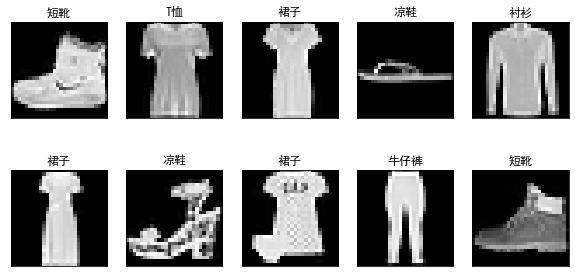

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(fd_train[i*10,:],cmap=plt.cm.gray)
    plt.title(get_fasion_minist_label(fl_train[i*10]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
nfd_train=fd_train.reshape(-1,784)
nfl_train=tf.one_hot(fl_train,10)
nfd_test=fd_test.reshape(-1,784)
nfl_test=tf.one_hot(fl_test,10)
print(nfd_train.shape,nfl_train.shape)

(60000, 784) (60000, 10)


<font size=4.5>对数据做一下归一化

In [ ]:
nfd_train=nfd_train.astype('float32')/255
nfd_test=nfd_test.astype('float32')/255

In [ ]:
scores1 = model.evaluate(nfd_train, nfl_train, verbose=0)
scores2 = model.evaluate(nfd_test, nfl_test, verbose=0)
print("训练数据集正确率为:" ,'%.2f' %(scores1[1]*100) , "%")
print("测试数据集正确率为:" ,'%.2f' %(scores2[1]*100) , "%")


训练数据集正确率为: 10.07 %
测试数据集正确率为: 10.03 %


<font size=4.5>使用fasion_minist数据集对网络进行训练</font>

In [ ]:
model.fit(nfd_train,nfl_train,validation_data=(nfd_test,nfl_test),
           epochs=20,batch_size=128,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 0.7175 - accuracy: 0.7463 - val_loss: 0.4725 - val_accuracy: 0.8307
Epoch 2/20
60000/60000 - 2s - loss: 0.3955 - accuracy: 0.8559 - val_loss: 0.4088 - val_accuracy: 0.8545
Epoch 3/20
60000/60000 - 2s - loss: 0.3515 - accuracy: 0.8726 - val_loss: 0.3782 - val_accuracy: 0.8646
Epoch 4/20
60000/60000 - 2s - loss: 0.3265 - accuracy: 0.8808 - val_loss: 0.3575 - val_accuracy: 0.8713
Epoch 5/20
60000/60000 - 2s - loss: 0.3051 - accuracy: 0.8879 - val_loss: 0.3461 - val_accuracy: 0.8739
Epoch 6/20
60000/60000 - 2s - loss: 0.2903 - accuracy: 0.8935 - val_loss: 0.3602 - val_accuracy: 0.8698
Epoch 7/20
60000/60000 - 2s - loss: 0.2788 - accuracy: 0.8961 - val_loss: 0.3463 - val_accuracy: 0.8754
Epoch 8/20
60000/60000 - 2s - loss: 0.2666 - accuracy: 0.9009 - val_loss: 0.3416 - val_accuracy: 0.8788
Epoch 9/20
60000/60000 - 2s - loss: 0.2551 - accuracy: 0.9057 - val_loss: 0.3312 - val_accuracy: 0.8795
Epoch 10/20
60

In [ ]:
acc1 = model.evaluate(nfd_test, nfl_test, verbose=0)
acc2 = model.evaluate(nd_test, nl_test, verbose=0)
print("fasion_minist测试数据集正确率为:" ,'%.2f' %(acc1[1]*100) , "%")
print("minist测试数据集正确率为:" ,'%.2f' %(acc2[1]*100) , "%")

fasion_minist测试数据集正确率为: 88.79 %
minist测试数据集正确率为: 16.57 %


In [ ]:
acc3 = model.evaluate(nfd_test, nfl_test, verbose=0)
acc4 = model.evaluate(nd_test, nl_test, verbose=0)
print("fasion_minist测试数据集正确率为:" ,'%.2f' %(acc3[1]*100) , "%")
print("minist测试数据集正确率为:" ,'%.2f' %(acc4[1]*100) , "%")

fasion_minist测试数据集正确率为: 87.11 %
minist测试数据集正确率为: 13.18 %


<font size=4.5>随机抽取10张测试数据集中的图片进行验证

In [ ]:
batch_mask = np.random.choice(nfd_test.shape[0], 10)
data=nfd_test[batch_mask]
label=fl_test[batch_mask]
result=model(data)
result=np.argmax(result,axis=1)
print(result,'\n',label)


[3 4 5 2 2 9 6 3 3 9] 
 [3 4 5 2 2 9 6 3 3 9]


## 网络保存与加载
### 网络保存
<font size=4.5>在TensorFlow的Keras API中提供了两种保存模型的方式，分别为model.save()、model.save_weights()，从字面上可以简单理解，后者仅保存网络结构权重，前者能够保存整个模型结构</font>
<font size=4.5>model.save()方法能够将整个模型进行保存，以两种方式存储，Tensorflow SavedModel、HDF file，保存的文件包括：<p>
模型结构，能够重新实例化模型；<p>
模型权重；<p>
优化器的状态，在上次中断的地方继续训练；<p>
可以通过tf.keras.models.load_model重新实例化保存的模型，通过该方法返回的模型是已经编译过的模型，除非在之前保存模型的时候就没有被编译；<p>
利用Sequential和Functional两种形式构建的网络都能够保存成HDF5和SavedModel格式，但是Subclasses形式的模型仅能够保存成SavedModel格式
    

    save(self,
           filepath,
           overwrite=True,
           include_optimizer=True,
           save_format=None,表示以tf或者h5形式进行存储，在TF2中默认tf
           signatures=None,
           options=None):

<font size=4.5>filepath和save_format结合在一起使用，有如下组合方式：

filepath以.h5为结尾的文件名，则不论save_format是tf或者h5，则模型将保存成filename.h5形式；（上级目录需要存在）<p>
filepath仅指定文件名，save_format='h5'，则模型将保存成filename的HDF形式；<p>
filepath指定路径(需存在)，save_format='tf'，则模型将以Tensorflow SavedModel形式保存到指定路径下；<p>
注意：filepath不包含后缀时，注意区分是文件目录还是文件名，以tf形式保存，则需要存在指定路径，以h5形式保存，则不能存在相同名称路径

<font size=4.5>**保存成tf格式**

In [ ]:

file_path=r'G:\save_model\number_model11.tf'
# model.save(file_path)

<font size=4.5>**保存h5格式**

In [ ]:
filename=r'G:\save_model\mymodel.h5'
# model.save(filename)

### 网络加载
<font size=4.5>tf.keras.models.load_model

In [ ]:
model1=tf.keras.models.load_model(filename)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


<font size=4.5 >**提示：**如果导入时失败，可能是h5py与tensorflow版本不匹配，试试使用h5py2.10版本
    ```
    import h5py
    file1=h5py.File(filename)
    model=tf.keras.models.load_model(file1)
    ```

In [ ]:
model2=tf.keras.models.load_model(file_path)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
acc3 = model1.evaluate(nfd_test, nfl_test, verbose=0)
acc4 = model2.evaluate(nfd_test, nfl_test, verbose=0)
print("model1测试数据集正确率为:" ,'%.2f' %(acc3[1]*100) , "%")
print("model2测试数据集正确率为:" ,'%.2f' %(acc4[1]*100) , "%")

model1测试数据集正确率为: 85.29 %
model2测试数据集正确率为: 85.29 %


In [ ]:
model=model1
print(id(model1),id(model2),id(model))


2231767889480 2231784880840 2231767889480
